In [3]:
import metadynminer as mm
from matplotlib import pyplot as plt
import numpy as np

In [4]:
#Plumed

Text(0.5, 1.0, 'bias potential')

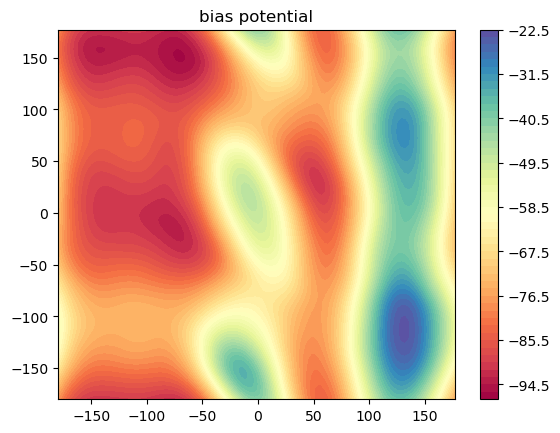

In [5]:
def stretched_gaussian(x, y, phi, psi, sigma_phi, sigma_psi, height):
    d1 = (phi-x)/(2*np.pi)
    d1[d1<-0.5] += 1
    d1[d1>0.5] -= 1
    d1 *= 2*np.pi

    d2 = (psi-y)/(2*np.pi)
    d2[d2<-0.5] += 1
    d2[d2>0.5] -= 1
    d2 *= 2*np.pi

    dp2 = d1**2 / (2*sigma_phi**2) + d2**2 / (2*sigma_psi**2)
    tmp = np.zeros(phi.shape)
    # stretch it at cutoff=6.25
    tmp[dp2<6.25] = height[dp2<6.25] * (np.exp(-dp2[dp2<6.25]) * 1.00193418799744762399 - 0.00193418799744762399)
    return tmp.sum()


# read hills
def get_bias():
    hills = np.loadtxt("acealanme").T
    phi = hills[1]
    psi = hills[2]
    sigma_phi = hills[3]
    sigma_psi = hills[4]
    height = hills[5]
    def bias(positions):
        ret = []
        x = positions[0] / 180 * np.pi
        y = positions[1] / 180 * np.pi
        for xx, yy in zip(x, y):
            ret.append(stretched_gaussian(xx, yy, phi, psi, sigma_phi, sigma_psi, height))
        return np.array(ret)
    return bias

bias = get_bias()

phi, psi = np.mgrid[-180:180:3, -180:180:3]
positions = np.vstack([phi.ravel(), psi.ravel()])
bias_potential = np.reshape(bias(positions).T, phi.shape)

plt.contourf(phi, psi, -bias_potential, levels=50, cmap="Spectral")
plt.colorbar()
plt.title("bias potential")

In [6]:
min_bias_plumed = -bias_potential - np.min(-bias_potential)

Text(0.5, 1.0, 'bias potential')

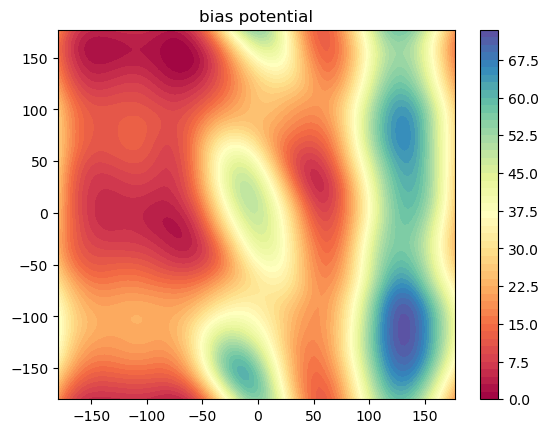

In [7]:
plt.contourf(phi, psi, min_bias_plumed, levels=50, cmap="Spectral")
plt.colorbar()
plt.title("bias potential")

In [8]:
#metadynminer

CPU times: user 8.04 s, sys: 7.01 ms, total: 8.04 s
Wall time: 8.04 s


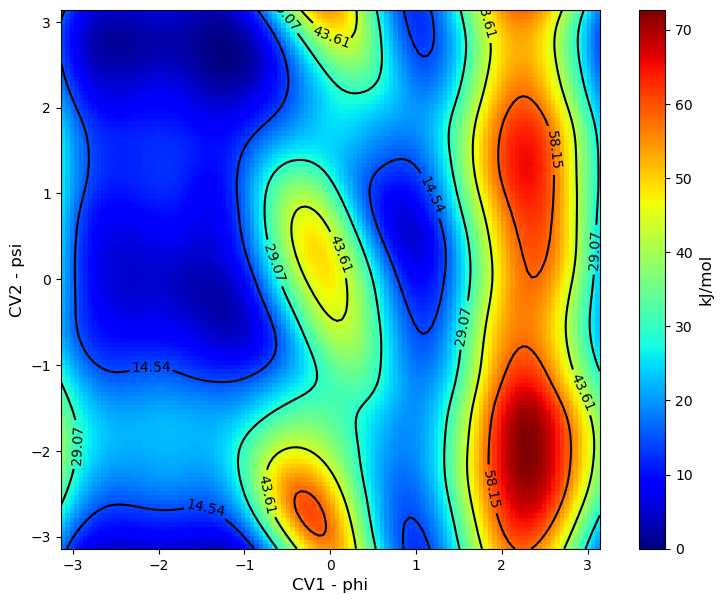

In [9]:
h = mm.Hills(name="acealanme", periodic=[True,True])
%time f = mm.Fes(h, resolution=120, original=True)
f.plot()

Text(0.5, 1.0, 'bias potential')

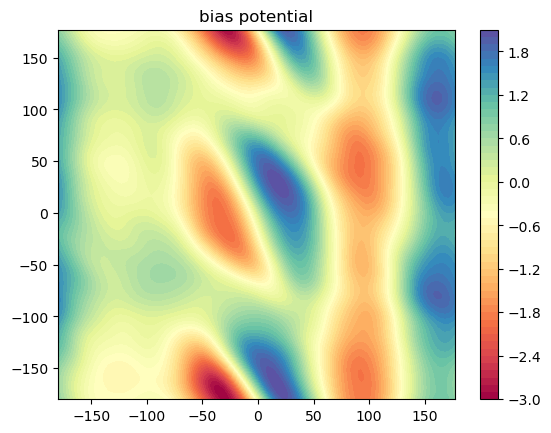

In [10]:
plt.contourf(phi, psi, (min_bias_plumed - f.fes), levels=50, cmap="Spectral")
plt.colorbar()
plt.title("bias potential")